In [1]:
import networkx as nx

# Trying out networkx

## ChatGPT example

In [2]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3, 4])

# Add edges
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (3, 4), (4, 1)])

print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 4), (2, 3), (3, 4)]


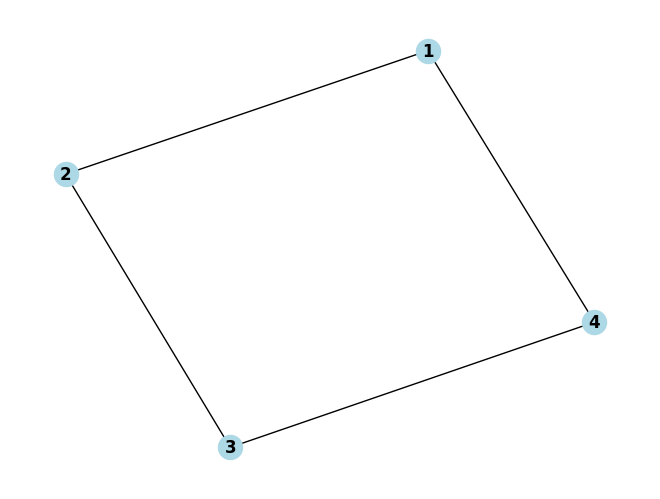

In [33]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color="lightblue", font_weight="bold")
plt.show()


In [29]:
# Compute shortest path between nodes
shortest_path = nx.shortest_path(G, source=1, target=3)
print("Shortest path:", shortest_path)


Shortest path: [1, 2, 3]


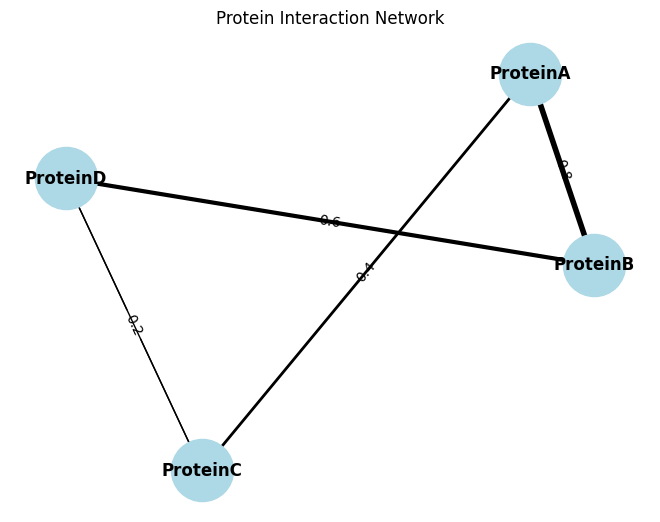

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Define proteins and their interaction rates
proteins = ["ProteinA", "ProteinB", "ProteinC", "ProteinD"]
interactions = [
    ("ProteinA", "ProteinB", 0.8),  # High interaction
    ("ProteinA", "ProteinC", 0.4),  # Moderate interaction
    ("ProteinB", "ProteinD", 0.6),  # Moderate interaction
    ("ProteinC", "ProteinD", 0.2),  # Low interaction
]

# Create a weighted graph
G = nx.Graph()

# Add nodes (proteins)
G.add_nodes_from(proteins)

# Add weighted edges (interactions)
for u, v, weight in interactions:
    G.add_edge(u, v, weight=weight)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Layout for consistent positioning
edge_weights = nx.get_edge_attributes(G, "weight")

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
nx.draw_networkx_edges(G, pos, width=[weight * 5 for weight in edge_weights.values()])  # Scale edge thickness

plt.title("Protein Interaction Network")
plt.show()


## Tryout with colocalization table

### Load table

In [259]:
import pandas as pd
import numpy as np

from Sequential_Fish.pipeline_parameters import RUN_PATH

PATH = RUN_PATH + "/result_tables"
coloc = pd.read_feather(PATH + "/Colocalisation.feather")
acquisition = pd.read_feather(PATH + "/Acquisition.feather")
detection = pd.read_feather(PATH + "/Detection.feather")
detection['color_id'] = detection['color_id'].astype(int)
gene1_key = "Gene1 (Ch1 - Cy3 - CAM_1)"
gene2_key = "Beads (Ch2 - Green - CAM_2)"
acquisition

,acquisition_id,location,cycle,full_path,fish_shape,fish_map,dapi_full_path,dapi_shape,dapi_map,fish_reodered_shape,Cycle n.,Gene1 (Ch1 - Cy3 - CAM_1),Beads (Ch2 - Green - CAM_2),Barcode 1,Threshold_0
0,0,Location-01,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[1, 51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
1,1,Location-02,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[1, 51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
2,2,Location-03,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[1, 51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
3,3,Location-04,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[1, 51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
4,4,Location-05,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[1, 56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 56, 2004, 2004, 2]",0,POLR2A,Beads,22,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,Location-06,20,None,"[1, 51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 51, 2004, 2004, 2]",20,Washout,Beads,45,350
206,206,Location-07,20,None,"[1, 56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 56, 2004, 2004, 2]",20,Washout,Beads,45,350
207,207,Location-08,20,None,"[1, 51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 51, 2004, 2004, 2]",20,Washout,Beads,45,350
208,208,Location-09,20,None,"[1, 56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[1, 56, 2004, 2004, 2]",20,Washout,Beads,45,350


### Merging names in Detection

In [261]:
rna_names = acquisition.melt(
    id_vars='acquisition_id',
    value_vars=[gene1_key],
    value_name="RNA",
    var_name="color_id"
    )
rna_names['color_id'] = rna_names['color_id'].replace({
    gene2_key : 1,
    gene1_key : 0,

}).astype(int)
rna_names

,acquisition_id,color_id,RNA
0,0,0,POLR2A
1,1,0,POLR2A
2,2,0,POLR2A
3,3,0,POLR2A
4,4,0,POLR2A
...,...,...,...
205,205,0,Washout
206,206,0,Washout
207,207,0,Washout
208,208,0,Washout


In [262]:
if 'RNA' not in detection.columns : 
    detection = pd.merge(
        detection,
        rna_names,
        on= ['acquisition_id', 'color_id'],
        validate= 'm:1',
    )
detection

,detection_id,acquisition_id,visual_name,filename,voxel_size,spot_size,alpha,beta,gamma,artifact_radius,cluster_size,min_spot_per_cluster,Threshold_0,threshold,color_id,image_path,image_key,location,RNA
0,1,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,525,525,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,1,Location-01,POLR2A
1,2,10,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,865,865,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,2,Location-01,Washout
2,3,20,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,865,865,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,3,Location-01,POLR2B
3,4,30,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,1300,1300,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,4,Location-01,Washout
4,5,40,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,1300,1300,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,5,Location-01,POLR2C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,169,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,480,480,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,206,Location-10,POLR2K
206,207,179,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,207,Location-10,Washout
207,208,189,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,208,Location-10,POLR2L
208,209,199,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,209,Location-10,Washout


In [263]:
if 'RNA1' not in coloc :
    coloc = pd.merge(
        coloc,
        detection.loc[:,['detection_id','RNA']].rename(columns={'RNA' : 'RNA1'}),
        left_on= 'detection_id1',
        right_on= 'detection_id',
        validate='m:1'
    )
if 'RNA2' not in coloc :
    coloc = pd.merge(
        coloc,
        detection.loc[:,['detection_id','RNA']].rename(columns={'RNA' : 'RNA2'}),
        left_on= 'detection_id2',
        right_on= 'detection_id',
        validate='m:1',
    )
if 'detection_id' in coloc.columns : coloc = coloc.drop('detection_id', axis=1)
if 'detection_id_x' in coloc.columns : coloc = coloc.drop('detection_id_x', axis=1)
if 'detection_id_y' in coloc.columns : coloc = coloc.drop('detection_id_y', axis=1)
coloc

/tmp/ipykernel_354005/4253874863.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'detection_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  coloc = pd.merge(


,colocalisation_id,count,detection_id1,detection_id2,population1,population2,label,spot1_number,spot2_number,location,cell_id,spot1_total_number,spot2_total_number,fraction,sub_fraction,RNA1,RNA2
0,0,89.0,1,1,all,all,1.0,89.0,89.0,Location-01,0,89.0,89.0,1.000000,1.000000,POLR2A,POLR2A
1,1,85.0,1,1,free,all,1.0,85.0,89.0,Location-01,0,89.0,89.0,0.955056,1.000000,POLR2A,POLR2A
2,2,4.0,1,1,clustered,all,1.0,4.0,89.0,Location-01,0,89.0,89.0,0.044944,1.000000,POLR2A,POLR2A
3,3,85.0,1,1,all,free,1.0,89.0,85.0,Location-01,0,89.0,89.0,0.955056,0.955056,POLR2A,POLR2A
4,4,85.0,1,1,free,free,1.0,85.0,85.0,Location-01,0,89.0,89.0,0.955056,1.000000,POLR2A,POLR2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27778,27778,NaN,210,210,free,free,2.0,0.0,0.0,Location-10,6,0.0,0.0,NaN,NaN,Washout,Washout
27779,27779,NaN,210,210,clustered,free,2.0,0.0,0.0,Location-10,6,0.0,0.0,NaN,NaN,Washout,Washout
27780,27780,NaN,210,210,all,clustered,2.0,0.0,0.0,Location-10,6,0.0,0.0,NaN,NaN,Washout,Washout
27781,27781,NaN,210,210,free,clustered,2.0,0.0,0.0,Location-10,6,0.0,0.0,NaN,NaN,Washout,Washout


### Computing average interaction rate

Interaction rate is taken as colocalization rate from 0 to 1 convert to percentage (x100)

,RNA1,RNA2,interaction_rate
1,POLR2A,POLR2B,1
2,POLR2A,POLR2C,1
3,POLR2A,POLR2E,1
4,POLR2A,POLR2F,1
5,POLR2A,POLR2H,1
...,...,...,...
102,POLR2L,POLR2E,4
103,POLR2L,POLR2F,5
104,POLR2L,POLR2H,5
105,POLR2L,POLR2I,4


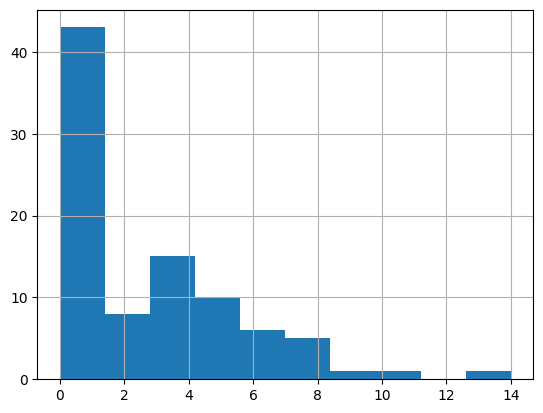

In [272]:
interactions = coloc.groupby(['RNA1', 'RNA2'])['sub_fraction'].mean().reset_index(drop=False).rename(columns={'sub_fraction' : 'interaction_rate'})
interactions['interaction_rate'] *=100
interactions['interaction_rate'] = interactions['interaction_rate'].round().astype(int)
interactions = interactions.loc[(interactions['RNA1'] != "Washout") & (interactions['RNA2'] != "Washout")]
interactions = interactions.loc[(interactions['RNA1'] != interactions['RNA2'])]

RNAs = pd.unique(
    pd.concat([interactions['RNA1'], interactions['RNA2']])
)

interactions['interaction_rate'].hist()
cutoff = 0

interactions = interactions.loc[interactions['interaction_rate'] >= cutoff]
interactions.sort_values("RNA1")

### Creating networkx undirected graph

### Testing directed multi-graph

In [273]:
interaction_graph = nx.MultiDiGraph()
data = list(interactions.itertuples(index=False, name=None))
interaction_graph.add_weighted_edges_from(data)

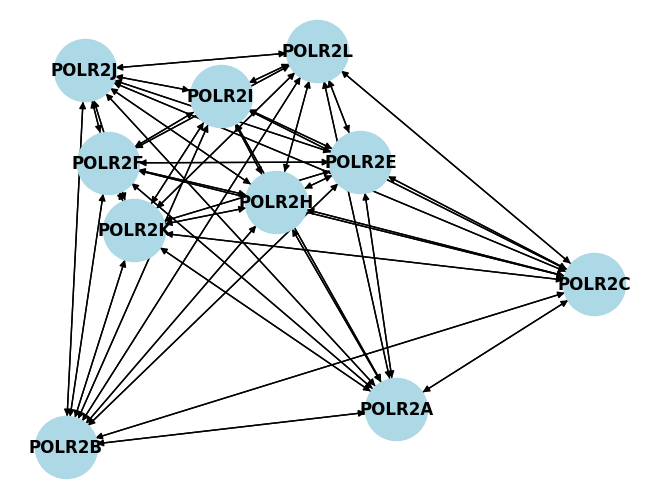

In [284]:
# pos = nx.spring_layout(interaction_graph, k=3)  # Layout for consistent positioning
nx.draw(interaction_graph, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)